## notebook to plot correlations between different features and brain parcel timecourses

In [63]:
import nibabel as nb
import nilearn as nl
import hcp_utils as hcp
import numpy as np
import pandas as pd
from os import walk


In [64]:
tsv_dir='../sourcedata/data/merlin/features/'

In [65]:
df=pd.read_csv(f'{tsv_dir}any_faces.tsv', sep='\t')
any_faces=df['value'][0:15135]
df=pd.read_csv(f'{tsv_dir}face.tsv', sep='\t')
face=df['value'][0:15135]

df=pd.read_csv(f'{tsv_dir}speech.tsv', sep='\t')
speech=df['value'][0:15135]
df=pd.read_csv(f'{tsv_dir}as-Speech.tsv', sep='\t')
as_speech=df['value'][0:15135]



df=pd.read_csv(f'{tsv_dir}any_faces_edited.tsv', sep='\t')
any_faces_edited=df['any_faces_edited'][0:15135]
df=pd.read_csv(f'{tsv_dir}speech_edited.tsv', sep='\t')
speech_edited=df['speech_edited'][0:15135]

In [66]:
d=pd.DataFrame({'face': face, 'any_faces': any_faces, 'any_faces_edited': any_faces_edited, 'speech': speech, 'as_speech': as_speech, 'speech_edited': speech_edited})

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

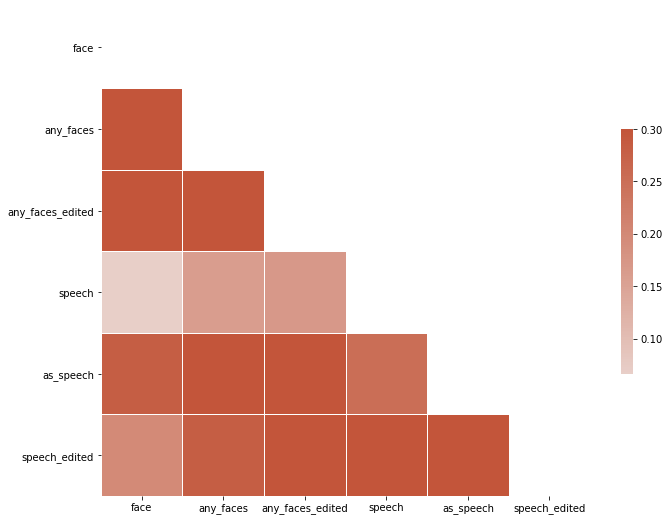

In [68]:
corr = d.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Now compare the face features (convolved) to MMP FFC

In [111]:
#load timecourse of FFCs from merlin subjects

timecourse_list=[]
sub_list=[]
parcel_list_id=[18,198,1,181,56,236,8,188]
parcel_list_name=['L_FFC','R_FFC','L_V1','R_V1','L_6v','R_6v','L_4','R_4']


parcel_dir='/om2/user/jsmentch/projects/nat_img/sourcedata/data/merlin/brain/merlin_cifti_clean_smooth_mmp/'
filenames = next(walk(parcel_dir), (None, None, []))[2]  # [] if no file

for p_i,parcel_id in enumerate(parcel_list_id):
    parcel_name=parcel_list_name[p_i]
    for f in filenames:
        sub_id=f[12:18]

        im_file = f'{parcel_dir}{f}'
        img = nb.load(im_file)
        img_y = img.get_fdata()
        #get FFC timecourse
        #timecourse=img_y[:1009,198]#FFC
        #timecourse=img_y[:1009,1]#L_V1
        timecourse=img_y[:1009,parcel_id]
        timecourse_list.append(timecourse)
        sub_list.append(f'{sub_id}_{parcel_name}')
timecourse_list=np.asarray(timecourse_list)
np.nan_to_num(timecourse_list, copy=False, nan=0.0 ) #some have NaNs...

array([[ 0.41645983, -0.24256022, -0.65899456, ..., -0.04160812,
        -0.15329957, -0.21139655],
       [ 1.67985868,  1.17254639,  0.78647214, ...,  0.51846457,
         0.61095029,  0.85032421],
       [-0.53326571, -0.74507177, -0.86866641, ...,  0.32284904,
         0.36721265,  0.45182616],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81781328,  0.42077529,  0.10689351, ...,  0.18516719,
         0.2520144 ,  0.23781279],
       [ 0.26565728, -0.1292745 , -0.46660036, ..., -0.44382241,
        -0.14318022,  0.07536303]])

In [112]:
#convolve features with HRF
import hrf_tools
d_hrf=hrf_tools.apply_optimal_hrf_10hz(d.to_numpy(),10)#apply optimal HRF
d_hrf = d_hrf[::15,:] #resample to 1.5 TR

In [113]:
#append features to timecourse list
timecourse_list=np.hstack((timecourse_list.T,d_hrf))
#append feature names to timecourse sub name list
for ff in ['face','any_faces','any_faces_edited','speech','as_speech','speech_edited']:
    sub_list.append(ff)

In [114]:
timecourse_list.shape

(1009, 150)

In [115]:
df = pd.DataFrame(timecourse_list, columns = sub_list)

In [116]:
# mask = np.ones_like(corr, dtype=bool)
# mask[:19,19:]=False


Text(0.5, 1.0, 'Merlin face+speech features and subject-level MMP L_4 (primary motor) timecourse')

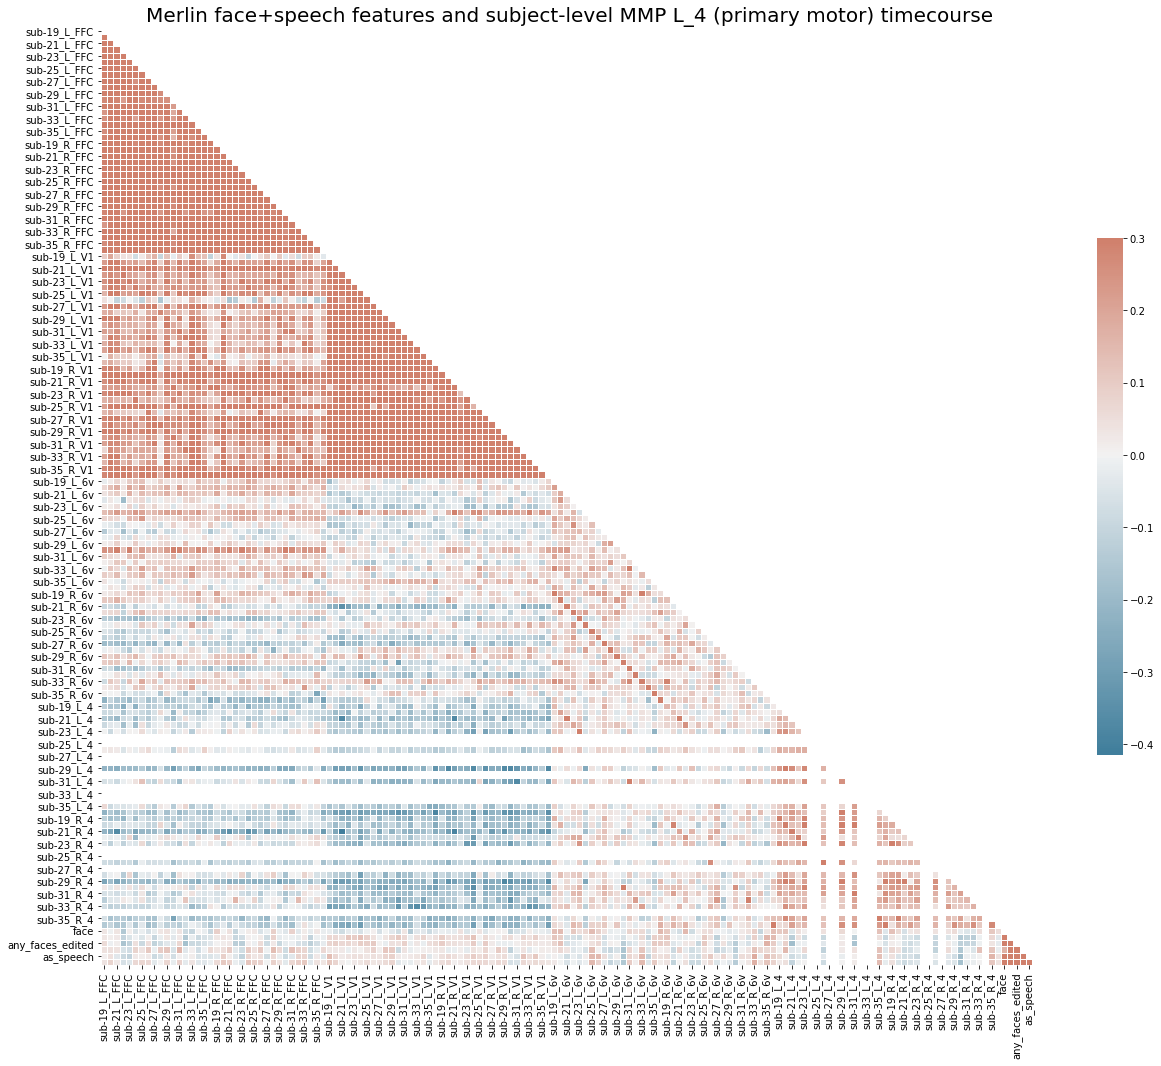

In [117]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(21, 19))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Merlin face+speech features and subject-level MMP L_4 (primary motor) timecourse", fontsize =20)